In [1]:
import tensorflow as tf
from matplotlib import pylab as plt
from matplotlib import cm
import numpy as np
import pylab
import math
#outmers = file

In [2]:
from numpy.ma.core import default_fill_value
# Framework from https://towardsdatascience.com/chaos-game-representation-of-a-genetic-sequence-4681f1a67e14
# Code was not functional as copied, so I rewrote most of it and applied theory from FCGR papers to make calcs


infasta = '/content/drive/MyDrive/Abf1_sf_90_fps_with_sf_fimo.fasta'

def prep_fasta(fasta):
  
  ff = open(infasta) # A set of FASTA sequences, no size limit (whole genomes acceptable)
  rawfa = ff.read().splitlines()
  fastseq = []
  
  for line in rawfa:
    if not (">" in line):
      fastseq.append(str(line)) # Trims FASTA headers
  
  return fastseq

# Set up values to build the CGR for each sequence

def build_cgr(dnalist, k):
  # Converts a list of DNA sequence strings into their CGR representations
  # for k-mers of the given size
  
  cgrdict = {}
  
  for seq in dnalist:
    
    inseq = str(seq) # The input sequence string
    mls = [] # A list to capture all the kmers of the string
    kcgr = {} # A dictionary to record the points for each kmer
    
    for i in range(len(inseq) - k - 1):
      mer = inseq[i:i+k] # Report the kmers found in the input string
      mls.append(mer) # Record the kmers in a list
    
    for kseq in mls:
      px = 0
      py = 0

      xa = xc = yg = yc = -1 #set the values for the calculation
      xt = xg = ya = yt = 1

      for b in kseq:
        
        px, py = px, py #update the cgr value
        
        if b == 'A':
          px = (xa - px)
          py = (ya - py)
        elif b == 'C':
          px = (xc - px)
          py = (yc - py)
        elif b == 'G':
          px = (xg - px)
          py = (yg - py)
        elif b == 'T':
          px = (xt - px)
          py = (yt - py)

        px,py = px/2,py/2 #Apply the scaling factor of 0.5
        
      kcgr[kseq] = px, py
    
    #if not (seq in cgrdict): # Don't repeat FASTA entries; may be useful sometimes though, not sure
    cgrdict[seq] = kcgr
  
  return cgrdict


In [3]:
def map_cgr(seqdict):
  seqcgrs = {}
  for frag in seqdict.keys():
    kmcgr = seqdict[frag]
    cgrlist = []
    for kmer in kmcgr.keys():
      point = kmcgr[kmer]
      cgrlist.append(point)
    seqcgrs[frag] = cgrlist
  return seqcgrs




In [11]:

def fcgr_plt(indic, binx, biny):
  mapdict = {}
  for cgrt in indic.keys():
    pts = indic[cgrt]
    xlist = []
    ylist = []
    for pt in pts:
      xval = pt[0]
      yval = pt[1]
      xlist.append(xval)
      ylist.append(yval)
    
    plt.rcParams["figure.figsize"] = [4, 4]
    plt.rcParams["figure.autolayout"] = False
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 2.5
    freqmap = plt.hist2d(xlist, ylist, bins = (binx, biny), cmap=cm.gray_r)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    mapdict[cgrt] = freqmap
  return mapdict
  

In [22]:

def fcgtensor(nd, bn):
  tensdict = {}
  bins = bn
  for cgrt in nd.keys():
    pts = nd[cgrt]
    xtlist = []
    ytlist = []
    for pt in pts:
      xtval = pt[0]
      ytval = pt[1]
      xtlist.append(xtval)
      ytlist.append(ytval)
    
    tensmap, binx, biny = np.histogram2d(xtlist, ytlist, bins = (bins, bins))
    tensdict[cgrt] = tensmap
  return tensdict

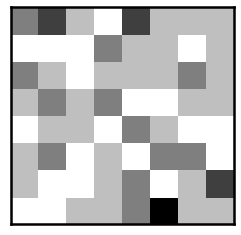

In [37]:
kv = 4
new_seq = prep_fasta(infasta)
cgrdict = build_cgr(new_seq, kv)
ptdict = map_cgr(cgrdict)
plts = fcgr_plt(ptdict, 8, 8)
#print(plts.values())
#intens = fcgtensor(ptdict, 8) # Returns a dictionary of sequences and their FCG representations
# Next task here is to associate cluster/classification from ML-based clustering of signal to each sequence
# This will define the classes of DNA sequence info we get from an experiment
# Pre-defined class annotations applied to FCGR representations should be sufficient for CNN processing
# The biggest point of concern currently is the number of observations:
# Using a pre-annotated dataset enables me to ask these questions: 
# is a CNN capable of discerning differences in DNA sequences purely based on the classifications we can make with unsupervised clustering of SF signal trajectories and LF patterning at a target site?

In [25]:
print(ptdict.values())

dict_values([[(0.6875, 0.1875), (-0.8125, -0.5625), (0.9375, 0.8125), (-0.9375, -0.9375), (-0.0625, 0.9375), (-0.4375, 0.0625), (-0.3125, 0.4375), (-0.3125, -0.6875), (0.6875, 0.8125), (0.1875, 0.0625), (-0.5625, 0.4375), (-0.1875, -0.6875), (-0.4375, -0.1875), (-0.3125, -0.4375), (0.6875, 0.6875), (-0.8125, 0.1875), (-0.0625, -0.5625), (0.5625, 0.8125), (-0.8125, -0.9375), (0.9375, 0.9375), (0.5625, -0.9375), (-0.8125, 0.9375), (0.9375, 0.0625), (0.0625, 0.4375), (-0.5625, -0.6875), (-0.1875, -0.1875), (-0.4375, 0.5625), (-0.3125, -0.8125), (0.6875, 0.9375), (-0.5625, -0.5625), (-0.1875, 0.8125), (-0.4375, -0.9375), (-0.0625, -0.0625), (0.1875, -0.5625), (0.4375, -0.1875), (-0.6875, -0.4375), (-0.1875, -0.3125), (-0.4375, -0.3125), (-0.3125, 0.6875), (0.1875, -0.9375), (-0.5625, 0.9375), (-0.1875, 0.0625), (0.5625, 0.4375), (-0.8125, -0.6875), (-0.0625, 0.8125), (0.1875, 0.9375), (-0.5625, 0.0625), (-0.1875, -0.5625), (-0.3125, 0.5625), (-0.3125, 0.1875), (0.6875, 0.3125), (0.1875, -0

In [24]:
print(intens.values())

dict_values([array([[2., 2., 0., 0., 1., 0., 0., 1.],
       [0., 2., 1., 1., 1., 2., 0., 1.],
       [3., 1., 2., 1., 2., 1., 3., 1.],
       [0., 3., 1., 2., 1., 0., 1., 3.],
       [1., 2., 0., 0., 1., 2., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 3., 2., 1., 3.],
       [0., 0., 0., 0., 1., 0., 0., 2.]]), array([[0., 2., 0., 0., 0., 1., 0., 3.],
       [1., 1., 1., 1., 1., 2., 2., 1.],
       [1., 2., 2., 3., 1., 2., 2., 1.],
       [1., 2., 1., 0., 1., 1., 1., 1.],
       [0., 2., 1., 1., 3., 1., 0., 0.],
       [0., 1., 0., 1., 0., 3., 0., 1.],
       [1., 1., 0., 1., 2., 1., 1., 1.],
       [1., 1., 0., 0., 2., 0., 0., 2.]]), array([[0., 1., 0., 1., 0., 2., 1., 1.],
       [0., 1., 0., 1., 1., 2., 1., 3.],
       [2., 0., 0., 0., 0., 0., 1., 2.],
       [1., 3., 2., 1., 0., 0., 1., 1.],
       [1., 3., 0., 0., 1., 3., 2., 0.],
       [2., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 2., 2., 3., 0., 0., 0.],
       [1., 0., 0., 0., 2., 3., 0., 2.]]

[(array([[2., 2., 0., 0., 1., 0., 0., 1.],
       [0., 2., 1., 1., 1., 2., 0., 1.],
       [3., 1., 2., 1., 2., 1., 3., 1.],
       [0., 3., 1., 2., 1., 0., 1., 3.],
       [1., 2., 0., 0., 1., 2., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 3., 2., 1., 3.],
       [0., 0., 0., 0., 1., 0., 0., 2.]]), array([-0.9375  , -0.703125, -0.46875 , -0.234375,  0.      ,  0.234375,
        0.46875 ,  0.703125,  0.9375  ]), array([-0.9375  , -0.703125, -0.46875 , -0.234375,  0.      ,  0.234375,
        0.46875 ,  0.703125,  0.9375  ]), <matplotlib.collections.QuadMesh object at 0x7fc21f48d8d0>), (array([[0., 2., 0., 0., 0., 1., 0., 3.],
       [1., 1., 1., 1., 1., 2., 2., 1.],
       [1., 2., 2., 3., 1., 2., 2., 1.],
       [1., 2., 1., 0., 1., 1., 1., 1.],
       [0., 2., 1., 1., 3., 1., 0., 0.],
       [0., 1., 0., 1., 0., 3., 0., 1.],
       [1., 1., 0., 1., 2., 1., 1., 1.],
       [1., 1., 0., 0., 2., 0., 0., 2.]]), array([-0.9375  , -0.703125, -0.46875 , -0.234

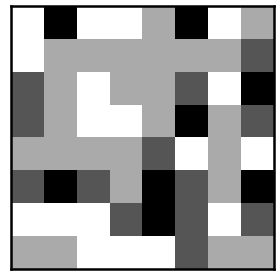

In [38]:
fpt1 = intens['GGTGTGTTTGTTCATATCACGGCATACGTTAACACAATGTAAATCTTGCTTTGGGTTGACTGAGGGAAATAACTATAGACATCACACCAA']
fpt2 = intens['TACTCAAGACCCGTGCAGATCACTATTACACTCATTATTACAAGTCATTGAGAACGAAATTTTGACATCATTACTAATAATGTTACTCAT']

fpk = ptdict.keys()
fpt = list(plts.values())
plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.5

pt1 = pylab.imshow(fpt1, cmap=cm.gray_r)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

print(fpt)

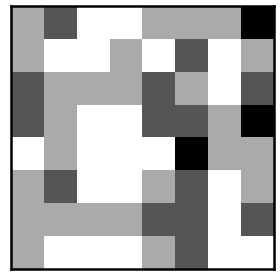

In [27]:
pt2 = pylab.imshow(fpt2, cmap=cm.gray_r)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


In [36]:
input_shape = (8, 8, 2)
cvl = tf.keras.layers.Conv2D(2, 2, input_shape=input_shape)(fpt[1])
print(cvl.shape)

ValueError: ignored